Styles html:

<B> gras </B>

<U> souligné </U>

<FONT color="#FF0000"> rouge </FONT>

<FONT color="#00FF00"> vert </FONT>

<FONT color="#0000FF"> bleu </FONT>

<FONT color="#FF00FF"> violet </FONT>

<FONT color="#FFFF00"> jaune </FONT>

(ca marche avec <FONT color="#F0F"> 3 </FONT> numéros au lieu de 6 je crois)



In [1]:
from my_hmf import My_Tinker08
import numpy as np
import matplotlib.pyplot as plt

 # Tests avec hmf

In [2]:
from hmf import MassFunction

In [3]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
}

n = 0.965

z = 1


In [4]:
mf = MassFunction(
    hmf_model="Tinker08",
    transfer_model="CAMB",
    cosmo_params=cosmo_params,
    Mmin=13,
    lnk_min=np.log(1e-4),
    lnk_max=np.log(1),
    z=z,
)
my_mf = My_Tinker08(z=z, cosmo_params=cosmo_params)

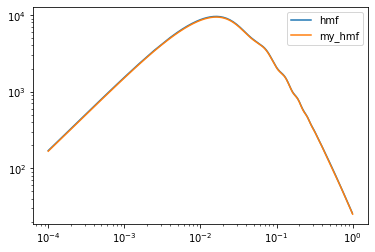

In [5]:
## Test P(k)
plt.xscale("log")
plt.yscale("log")
plt.plot(mf.k, mf.power, label="hmf")
plt.plot(my_mf.k, my_mf.Pk, label="my_hmf")
plt.legend()
plt.show()

0.49660200183300796


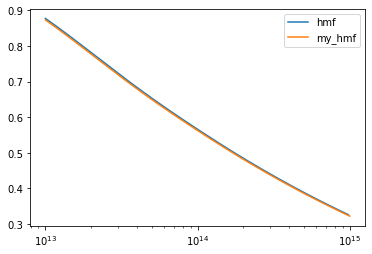

In [6]:
## Test sigma
print(my_mf.sigma_8)
plt.plot(mf.m, mf.sigma, label="hmf")
plt.plot(my_mf.m, my_mf.sigma, label="my_hmf")
plt.xscale("log")
plt.legend()
plt.show()

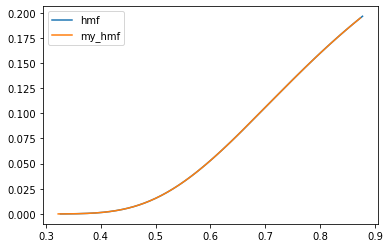

In [7]:
## Test fsigma
plt.plot(mf.sigma, mf.fsigma, label="hmf")
plt.plot(my_mf.sigma, my_mf.fsigma, label="my_hmf")
plt.legend()
plt.show()

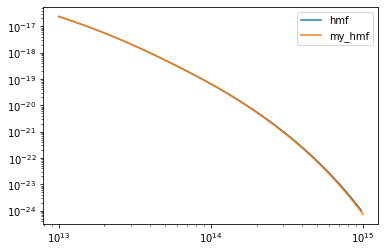

81595768410.27423
81572151878.2976


In [8]:
## Test dndm
plt.xscale("log")
plt.yscale("log")
plt.plot(mf.m, mf.dndm, label="hmf")
plt.plot(my_mf.m, my_mf.dndm, label="my_hmf")
plt.legend()
plt.show()

## Pour le debug
print(mf.mean_density0)
print(my_mf.rho_m_Masse)

 ### Comparaison hmf et My_hmf pour 4 redshifts différents

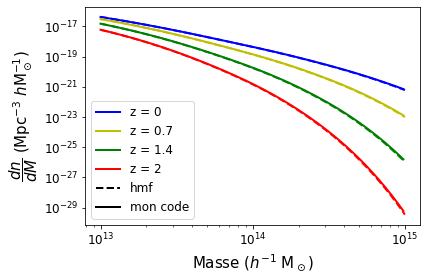

In [45]:
fig, ax = plt.subplots()
colors = {0: "b", 0.7: "y", 1.4: "g", 2: "r"}
for z in [0, 0.7, 1.4, 2]:
    mf = MassFunction(
    hmf_model="Tinker08",
    transfer_model="CAMB",
    cosmo_params=cosmo_params,
    Mmin=13,
    lnk_min=np.log(1e-4),
    lnk_max=np.log(1),
    z=z,
    )
    my_mf = My_Tinker08(z=z, cosmo_params=cosmo_params)
    plt.plot(my_mf.m, my_mf.dndm, "--", color=colors[z], linewidth=2)
    plt.plot(mf.m, mf.dndm, label=f"z = {z}", color=colors[z], linewidth=2)
plt.plot([], [], label="hmf", color="black", linestyle="--", linewidth=2)
plt.plot([], [], label="mon code", color="black", linewidth=2)
plt.xlabel(r"Masse ($h^{-1}$ M$_\odot$)", size=15)
plt.ylabel(r"$\dfrac{dn}{dM}$ (Mpc$^{-3}$ $h$M$_\odot^{-1}$)", size=15)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=12)
# plt.tick_params(axis="both", labelsize=12) # équivelent aux 2 lignes suivantes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Effets baryoniques du groupe de Giri

In [68]:
Giri = {
        "log10Mc": 13.32,
        "mu": 0.93,
        "thej": 4.235,
        "gamma": 2.25,
        "delta": 6.40,
        "eta": 0.15,
        "deta": 0.14,
}

Girimin = {
        "log10Mc": 11,
        "mu": 0,
        "thej": 2,
        "gamma": 1,
        "delta": 3,
        "eta": 0.05,
        "deta": 0.05,
}
Girimax = {
        "log10Mc": 15,
        "mu": 2,
        "thej": 8,
        "gamma": 4,
        "delta": 11,
        "eta": 0.4,
        "deta": 0.25,
}

mf = My_Tinker08()
mfG = My_Tinker08(baryons_effect="Giri", baryons_params = Giri)

#### On vérifie qu'on retrouve bien la courbe de l'article de Giri

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.


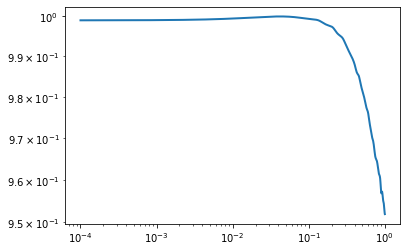

In [69]:
plt.loglog(mf.k,mfG.Pk/mf.Pk, linewidth = 2)
plt.show()

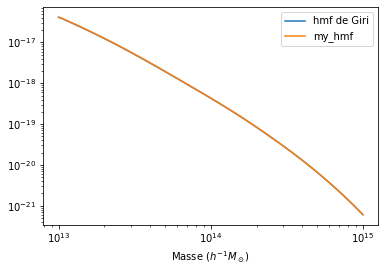

In [70]:
## Test dndm
plt.plot(mfG.m, mfG.dndm, label="hmf de Giri")
plt.plot(mf.m, mf.dndm, label="my_hmf")
plt.xlabel(r"Masse ($h^{-1} M_\odot$)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

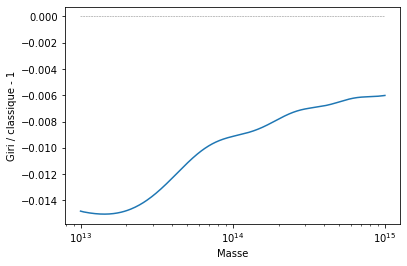

In [71]:
## Rapport des fonctions de masse
plt.plot(mf.m,mfG.dndm/mf.dndm - 1)
plt.plot(mf.m,np.zeros(len(mf.m)), linestyle="--", color="grey", linewidth=0.5)
plt.xscale("log")
plt.xlabel("Masse")
plt.ylabel("Giri / classique - 1")
plt.show()

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.


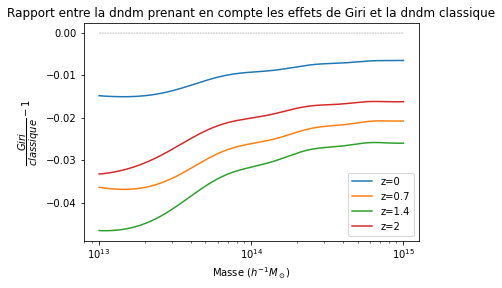

In [24]:
## On fait varier z
def vary_z(L_z):
    for z in L_z:
        mf = My_Tinker08(z=z, kmin=0.034, kmax=1)
        mfG = My_Tinker08(z=z, baryons_effect="Giri", baryons_params=Giri, kmin=0.034, kmax=1)
        plt.plot(mf.m, mfG.dndm / mf.dndm - 1, label=f"z={z}")
    plt.plot(mf.m, np.zeros(len(mf.m)), linestyle="--", color="grey", linewidth=0.5)
    plt.legend()
    plt.xscale("log")
    plt.xlabel(r"Masse ($h^{-1} M_\odot$)")
    plt.title(
        "Rapport entre la dndm prenant en compte les effets de Giri et la dndm classique"
    )
    plt.ylabel(r"$\dfrac{Giri}{classique} - 1$")
    plt.show()


L_z = [0, 0.7, 1.4, 2]  # ,1.5,1.6,1.7,1.8,1.9


vary_z(L_z)

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

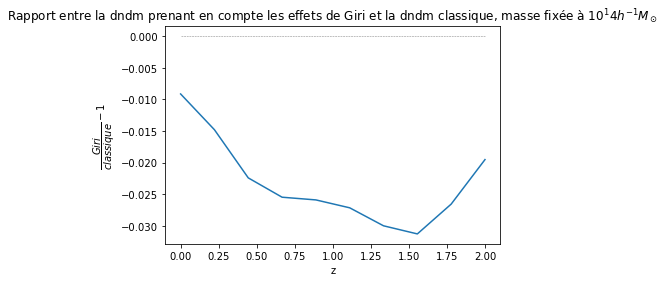

In [25]:
## On fait varier z pour M fixée
def vary_z_Mfixe():
    L_z = np.linspace(0, 2, 10)
    dndm = []
    for z in L_z:
        mf = My_Tinker08(z=z)
        mfG = My_Tinker08(z=z, baryons_effect="Giri", baryons_params=Giri)
        i = np.where(mf.m > 1e14)[0][0]
        dndm.append(mfG.dndm[i] / mf.dndm[i] - 1)
    plt.plot(L_z, dndm)
    plt.plot(L_z, np.zeros(len(L_z)), linestyle="--", color="grey", linewidth=0.5)
    plt.xlabel("z")
    plt.title(
        r"Rapport entre la dndm prenant en compte les effets de Giri et la dndm classique, masse fixée à $10^14 h^{-1} M_\odot$"
    )
    plt.ylabel(r"$\dfrac{Giri}{classique} - 1$")
    plt.show()


vary_z_Mfixe()

Emulators loaded.
Baryon fraction is set to 0.158
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.193
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.


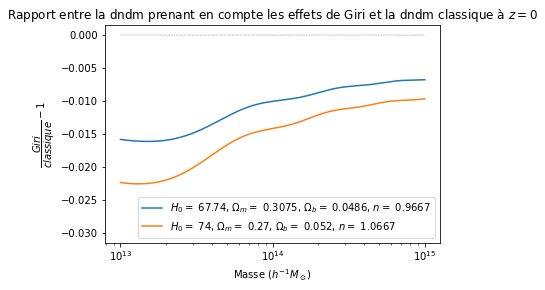

In [26]:
## On fait varier la cosmologie pour z=0
def vary_cosmo(L_params):
    for params in L_params:
        mf = My_Tinker08(cosmo_params=params)
        mfG = My_Tinker08(cosmo_params=params, baryons_effect="Giri", baryons_params = Giri)
        plt.plot(
            mf.m,
            mfG.dndm / mf.dndm - 1,
            label=rf"$H_0 =$ {params['H0']}, $\Omega_m =$ {params['Om0']}, $\Omega_b =$ {params['Ob0']}, $n =$ {params['n']}",
        )
    plt.plot(mf.m, np.zeros(len(mf.m)), linestyle="--", color="grey", linewidth=0.5)
    plt.plot([1e13], [-0.03], color="white")
    plt.legend()
    plt.xscale("log")
    plt.xlabel(r"Masse ($h^{-1} M_\odot$)")
    plt.title(
        r"Rapport entre la dndm prenant en compte les effets de Giri et la dndm classique à $z=0$"
    )
    plt.ylabel(r"$\dfrac{Giri}{classique} - 1$")
    plt.show()


cosmo_params1 = {
    "H0": 67.74,
    "Om0": 0.3075,
    "Ob0": 0.0486,
    "n": 0.9667,
}

cosmo_params2 = {"H0": 74, "Om0": 0.27, "Ob0": 0.052, "n": 1.0667}

vary_cosmo([cosmo_params1,cosmo_params2])

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

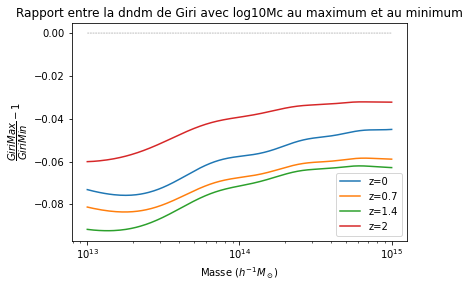

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Parameters evolved.
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Parameters evolved.
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Parameters evolved.
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions m

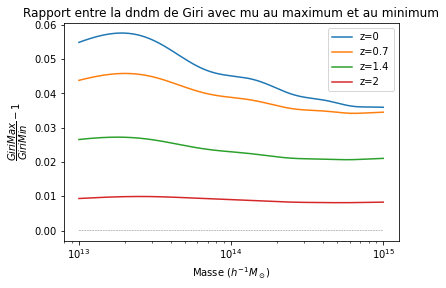

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

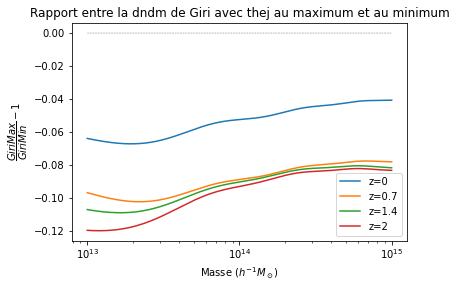

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

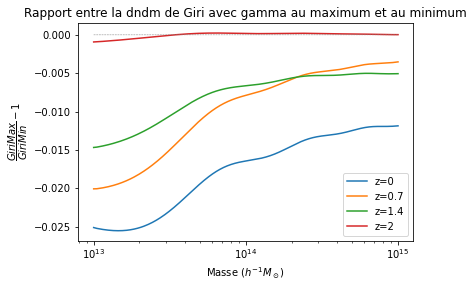

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

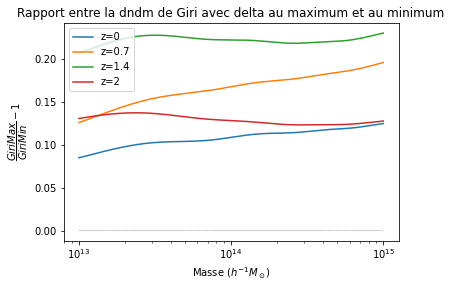

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

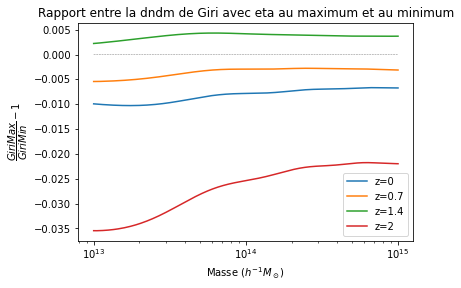

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and th

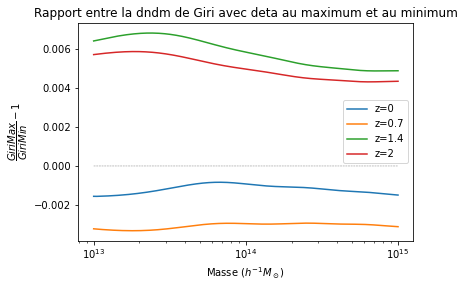

In [27]:
## On teste l'influence des paramètres de Giri sur dndm, pour différents redshifts

def vary_Giri(L_z):
    Giribismin = {c: Giri[c] for c in Giri}# on copie le dictionnaire Giri
    Giribismax = {c: Giri[c] for c in Giri}# on copie le dictionnaire Giri à nouveau
    for param in Giri:
        Giribismin[param] = Girimin[param]
        Giribismax[param] = Girimax[param]
        for z in L_z:
            mfGmin = My_Tinker08(z=z, baryons_effect = "Giri",baryons_params=Giribismin, kmin=0.034, kmax=1)
            mfGmax = My_Tinker08(
                z=z, baryons_effect = "Giri",baryons_params=Giribismax, kmin=0.034, kmax=1
            )  # dndm modifiée (1 paramètre de Giri changé)
            plt.plot(mfGmin.m, mfGmax.dndm / mfGmin.dndm - 1, label=f"z={z}")
        Giribismin[param] = Giri[param]
        Giribismax[param] = Giri[param]
        plt.plot(
            mfGmin.m,
            np.zeros(len(mfGmin.m)),
            linestyle="--",
            color="grey",
            linewidth=0.5,
        )
        plt.legend()
        plt.xscale("log")
        plt.xlabel(r"Masse ($h^{-1} M_\odot$)")
        plt.title(
            f"Rapport entre la dndm de Giri avec {param} au maximum et au minimum"
        )
        plt.ylabel(r"$\dfrac{GiriMax}{GiriMin} - 1$")
        plt.show()


L_z = [0, 0.7, 1.4, 2]  # ,1.5,1.6,1.7,1.8,1.9

vary_Giri(L_z)

### Influence sur la fonction de masse

Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.
Emulators loaded.
Baryon fraction is set to 0.153
Suppressions modelled at k<0.034 h/Mpc are outside the training set and therefore extrapolated.


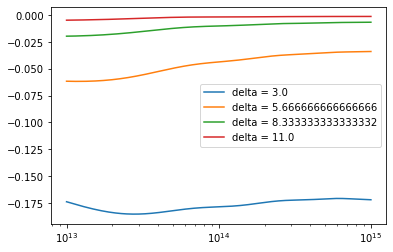

In [81]:
def test_influence_param(param,z=0,n=4):
    """param: le nom de l'un des 7 paramètres de Giri
    Affiche n courbes pour des valeurs de param uniformément réparties sur son intervalle de définition """
    pas = (Girimax[param] - Girimin[param])/(n-1)
    mf = My_Tinker08(z=z)
    Giritemp = {c:Giri[c] for c in Giri}
    for i in range(n):
        Giritemp[param] =  Girimin[param] + pas*i
        mfG = My_Tinker08(baryons_effect = "Giri", baryons_params=Giritemp,z=z)
        #plt.plot(mfG.m,mfG.dndm, label=f"{param} = {Giritemp[param]}")
        plt.plot(mf.m,mfG.dndm/mf.dndm - 1, label=f"{param} = {Giritemp[param]}")
    plt.xscale('log')
    plt.legend()
    plt.show()

                 
test_influence_param('delta',z=1.4)